In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('data/result/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
with open('data/result/xgb_pred.pkl', 'rb') as f:
    xgb_pred = pickle.load(f)

with open('data/result/pa_pred.pkl', 'rb') as f:
    pa_pred = pickle.load(f)
    
with open('data/result/aa_pred.pkl', 'rb') as f:
    aa_pred = pickle.load(f)
    
with open('data/result/jc_pred.pkl', 'rb') as f:
    jc_pred = pickle.load(f)
    
with open('data/result/cn_pred.pkl', 'rb') as f:
    cn_pred = pickle.load(f)
    
with open('data/result/kz_pred.pkl', 'rb') as f:
    kz_pred = pickle.load(f)

with open('data/result/fi.pkl', 'rb') as f:
    fi_xgb = pickle.load(f)

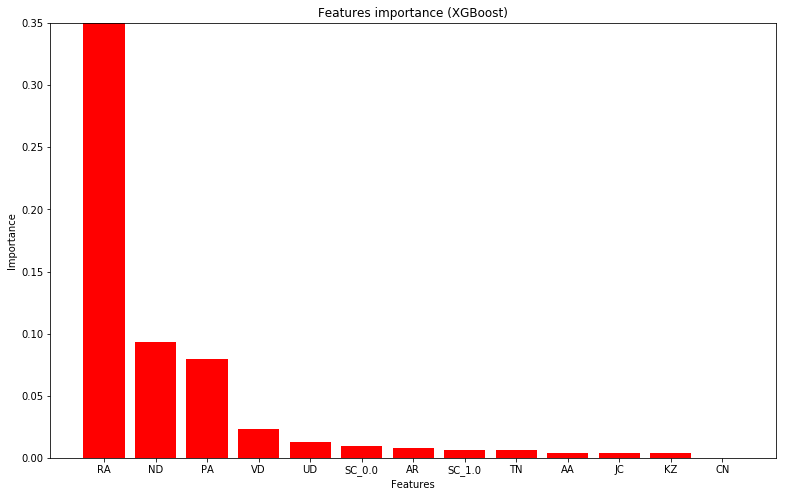

In [3]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
importance = fi_xgb[1]
features = fi_xgb[0]
indices = np.argsort(fi_xgb[1])[::-1]
fig=plt.figure(figsize=(13,8))
plt.bar(range(fi_xgb.shape[1]),height=importance[indices], align='center',color='r')
plt.title('Features importance (XGBoost)')
plt.xticks(range(fi_xgb.shape[1]), features[indices])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.ylim((0, 0.35))
fig.savefig('feature_importance_xgb.png')
plt.show()

In [4]:
fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, xgb_pred[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
fpr_pa, tpr_pa, threshold = roc_curve(y_test, pa_pred)
roc_auc_pa = auc(fpr_pa, tpr_pa)
fpr_aa, tpr_aa, threshold = roc_curve(y_test, aa_pred)
roc_auc_aa = auc(fpr_aa, tpr_aa)
fpr_jc, tpr_jc, threshold = roc_curve(y_test, jc_pred)
roc_auc_jc = auc(fpr_jc, tpr_jc)
fpr_cn, tpr_cn, threshold = roc_curve(y_test, cn_pred)
roc_auc_cn = auc(fpr_cn, tpr_cn)
fpr_kz, tpr_kz, threshold = roc_curve(y_test, kz_pred)
roc_auc_kz = auc(fpr_kz, tpr_kz)

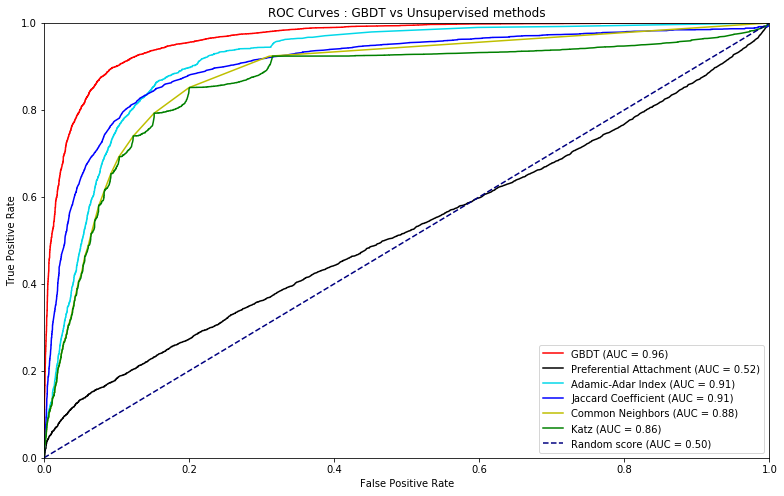

In [5]:
fig=plt.figure(figsize=(13,8))
plt.title('ROC Curves : GBDT vs Unsupervised methods')
plt.plot(fpr_xgb, tpr_xgb, 'r', label = 'GBDT (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_pa, tpr_pa, 'black', label = 'Preferential Attachment (AUC = %0.2f)' % roc_auc_pa)
plt.plot(fpr_aa, tpr_aa, 'xkcd:aqua blue', label = 'Adamic-Adar Index (AUC = %0.2f)' % roc_auc_aa)
plt.plot(fpr_jc, tpr_jc, 'b', label = 'Jaccard Coefficient (AUC = %0.2f)' % roc_auc_jc)
plt.plot(fpr_cn, tpr_cn, 'y', label = 'Common Neighbors (AUC = %0.2f)' % roc_auc_cn)
plt.plot(fpr_kz, tpr_kz, 'g', label = 'Katz (AUC = %0.2f)' % roc_auc_kz)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random score (AUC = 0.50)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
fig.savefig('roc_curves.png')
plt.show()